In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


%matplotlib inline

## Setup data

In [3]:
from utils.data import X, y_log
from utils.visualization import plot_decisions

## Parameter Tuning

In [5]:
min_samples_split_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
max_depth_range = [1, 2, 4, 5, 10, 15, 20, 25]
n_estimators_range = [10, 20, 50, 100, 150, 200, 500]

In [6]:
grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid={"min_samples_split": min_samples_split_range,
                "max_depth": max_depth_range,
                "n_estimators": n_estimators_range},
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
)

In [8]:
grid_search.fit(X, y_log)

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [1, 2, 4, 5, 10, 15, 20, 25], 'n_estimators': [10, 20, 50, 100, 150, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [9]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
grid_search.best_score_

-1.2050081455107489

## Visualize Decisions

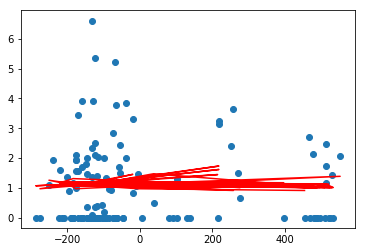

In [13]:
plot_decisions(grid_search.best_estimator_, X, y_log)